In [36]:
import pandas as pd

data = pd.read_csv("sengketa2.csv", sep=";")
data.head(5)

,"conversation_id_str,""created_at"",""favorite_count"",""full_text"",""id_str"",""image_url"",""in_reply_to_screen_name"",""lang"",""location"",""quote_count"",""reply_count"",""retweet_count"",""tweet_url"",""user_id_str"",""username""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"1774026849569681743,""Sat Mar 30 22:54:51 +0000...",NaN,NaN,NaN,NaN
1,"1774202668959060383,""Sat Mar 30 22:30:54 +0000...",NaN,NaN,NaN,NaN
2,"1774146318312878424,""Sat Mar 30 22:14:54 +0000...",NaN,NaN,NaN,NaN
3,"1773971954686623760,""Sat Mar 30 21:56:41 +0000...",NaN,NaN,NaN,NaN
4,"1774053581320307067,""Sat Mar 30 21:41:15 +0000...",NaN,NaN,NaN,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 5 columns):
 #   Column                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                           --------------  ----- 
 0   conversation_id_str,"created_at","favorite_count","full_text","id_str","image_url","in_reply_to_screen_name","lang","location","quote_count","reply_count","retweet_count","tweet_url","user_id_str","username"  1676 non-null   object
 1   Unnamed: 1                                                                                                                                                                        

In [38]:
data.drop_duplicates(subset ="full_text", keep = 'first', inplace = True)
data.info()

KeyError: Index(['full_text'], dtype='object')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.DataFrame(data["full_text"])
df.head(500)

Index(['conversation_id_str,"created_at","favorite_count","full_text","id_str","image_url","in_reply_to_screen_name","lang","location","quote_count","reply_count","retweet_count","tweet_url","user_id_str","username"',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


ValueError: Length mismatch: Expected axis has 5 elements, new values have 15 elements

**CLEANING/CLEASING**

In [19]:
import re
import string
import nltk

def remove_URL(tweet):
  url = re.compile(r'https?://\s+|www\.\s+')
  return url.sub(r'', tweet)

def remove_html(tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                          "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_numbers(tweet):
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbol(tweet):
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['cleasing'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_html(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_emoji(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_numbers(x))
df['cleasing'] = df['cleasing'].apply(lambda x: remove_symbol(x))

df.head(500)

NameError: name 'df' is not defined

**CASE FOLDING**

In [ ]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else:
      return text

df['case_folding'] =  df['cleasing'].apply(case_folding)
df.head(500)

,full_text,cleasing,case_folding
0,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...
1,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...
2,@MukarromahNur78 @msaid_didu Food estate aja g...,@MukarromahNur @msaid_didu Food estate aja gag...,@mukarromahnur @msaid_didu food estate aja gag...
3,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvonenews dasamuka mk hancur kpk hancur food...
4,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @santorinissun harusnya internet c...
...,...,...,...
495,@RAP1612RAP @Bangher1_ @xquitavee @Dennysirega...,@RAPRAP @Bangher_ @xquitavee @Dennysiregar @__...,@raprap @bangher_ @xquitavee @dennysiregar @__...
496,@Dennysiregar7 Gimana caranya makan gratis. ? ...,@Dennysiregar Gimana caranya makan gratis. ? F...,@dennysiregar gimana caranya makan gratis. ? f...
497,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@dirhamfaizal @minietweets_ @budimandjatmiko j...
498,@DediMulyadi71 contohnya food estate..ya bro,@DediMulyadi contohnya food estate..ya bro,@dedimulyadi contohnya food estate..ya bro


**TOKENIZATION**

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(500)

,full_text,cleasing,case_folding,tokenize
0,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ..."
1,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ..."
2,@MukarromahNur78 @msaid_didu Food estate aja g...,@MukarromahNur @msaid_didu Food estate aja gag...,@mukarromahnur @msaid_didu food estate aja gag...,"[@mukarromahnur, @msaid_didu, food, estate, aj..."
3,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvonenews dasamuka mk hancur kpk hancur food...,"[@tvonenews, dasamuka, mk, hancur, kpk, hancur..."
4,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @santorinissun harusnya internet c...,"[@geetracker, @santorinissun, harusnya, intern..."
...,...,...,...,...
495,@RAP1612RAP @Bangher1_ @xquitavee @Dennysirega...,@RAPRAP @Bangher_ @xquitavee @Dennysiregar @__...,@raprap @bangher_ @xquitavee @dennysiregar @__...,"[@raprap, @bangher_, @xquitavee, @dennysiregar..."
496,@Dennysiregar7 Gimana caranya makan gratis. ? ...,@Dennysiregar Gimana caranya makan gratis. ? F...,@dennysiregar gimana caranya makan gratis. ? f...,"[@dennysiregar, gimana, caranya, makan, gratis..."
497,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@dirhamfaizal @minietweets_ @budimandjatmiko j...,"[@dirhamfaizal, @minietweets_, @budimandjatmik..."
498,@DediMulyadi71 contohnya food estate..ya bro,@DediMulyadi contohnya food estate..ya bro,@dedimulyadi contohnya food estate..ya bro,"[@dedimulyadi, contohnya, food, estate..ya, bro]"


**FILTERING/STOPWORD REMOVAL**



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering/stopwords removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(500)

,full_text,cleasing,case_folding,tokenize,Filtering/stopwords removal
0,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ...","[sih, food, estate, realisasikan,, bentuk, kor..."
1,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ...","[sih, food, estate, realisasikan,, bentuk, kor..."
2,@MukarromahNur78 @msaid_didu Food estate aja g...,@MukarromahNur @msaid_didu Food estate aja gag...,@mukarromahnur @msaid_didu food estate aja gag...,"[@mukarromahnur, @msaid_didu, food, estate, aj...","[@mukarromahnur, @msaid_didu, food, estate, aj..."
3,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvonenews dasamuka mk hancur kpk hancur food...,"[@tvonenews, dasamuka, mk, hancur, kpk, hancur...","[@tvonenews, dasamuka, mk, hancur, kpk, hancur..."
4,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @santorinissun harusnya internet c...,"[@geetracker, @santorinissun, harusnya, intern...","[@geetracker, @santorinissun, internet, cepat,..."
...,...,...,...,...,...
495,@RAP1612RAP @Bangher1_ @xquitavee @Dennysirega...,@RAPRAP @Bangher_ @xquitavee @Dennysiregar @__...,@raprap @bangher_ @xquitavee @dennysiregar @__...,"[@raprap, @bangher_, @xquitavee, @dennysiregar...","[@raprap, @bangher_, @xquitavee, @dennysiregar..."
496,@Dennysiregar7 Gimana caranya makan gratis. ? ...,@Dennysiregar Gimana caranya makan gratis. ? F...,@dennysiregar gimana caranya makan gratis. ? f...,"[@dennysiregar, gimana, caranya, makan, gratis...","[@dennysiregar, gimana, makan, gratis., ?, foo..."
497,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@dirhamfaizal @minietweets_ @budimandjatmiko j...,"[@dirhamfaizal, @minietweets_, @budimandjatmik...","[@dirhamfaizal, @minietweets_, @budimandjatmik..."
498,@DediMulyadi71 contohnya food estate..ya bro,@DediMulyadi contohnya food estate..ya bro,@dedimulyadi contohnya food estate..ya bro,"[@dedimulyadi, contohnya, food, estate..ya, bro]","[@dedimulyadi, contohnya, food, estate..ya, bro]"


**STEMMING DATA**

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(word_list):
    return ' '.join([stemmer.stem(word) for word in word_list])

# Assuming 'Filtering/stopwords removal' is the correct column name
df['stemming_data'] = df['Filtering/stopwords removal'].apply(stem_text)
df.head(500)


,full_text,cleasing,case_folding,tokenize,Filtering/stopwords removal,stemming_data
0,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ...","[sih, food, estate, realisasikan,, bentuk, kor...",sih food estate realisasi bentuk korupsi penya...
1,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"[sebenarnya, untuk, apa, sih, di, buat, food, ...","[sih, food, estate, realisasikan,, bentuk, kor...",sih food estate realisasi bentuk korupsi penya...
2,@MukarromahNur78 @msaid_didu Food estate aja g...,@MukarromahNur @msaid_didu Food estate aja gag...,@mukarromahnur @msaid_didu food estate aja gag...,"[@mukarromahnur, @msaid_didu, food, estate, aj...","[@mukarromahnur, @msaid_didu, food, estate, aj...",mukarromahnur msaid didu food estate aja gagal...
3,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvonenews dasamuka mk hancur kpk hancur food...,"[@tvonenews, dasamuka, mk, hancur, kpk, hancur...","[@tvonenews, dasamuka, mk, hancur, kpk, hancur...",tvonenews dasamuka mk hancur kpk hancur food e...
4,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @santorinissun harusnya internet c...,"[@geetracker, @santorinissun, harusnya, intern...","[@geetracker, @santorinissun, internet, cepat,...",geetracker santorinissun internet cepat manfaa...
...,...,...,...,...,...,...
495,@RAP1612RAP @Bangher1_ @xquitavee @Dennysirega...,@RAPRAP @Bangher_ @xquitavee @Dennysiregar @__...,@raprap @bangher_ @xquitavee @dennysiregar @__...,"[@raprap, @bangher_, @xquitavee, @dennysiregar...","[@raprap, @bangher_, @xquitavee, @dennysiregar...",raprap bangher xquitavee dennysiregar anakkolo...
496,@Dennysiregar7 Gimana caranya makan gratis. ? ...,@Dennysiregar Gimana caranya makan gratis. ? F...,@dennysiregar gimana caranya makan gratis. ? f...,"[@dennysiregar, gimana, caranya, makan, gratis...","[@dennysiregar, gimana, makan, gratis., ?, foo...",dennysiregar gimana makan gratis food estate ...
497,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@DirhamFaizal @Minietweets_ @budimandjatmiko J...,@dirhamfaizal @minietweets_ @budimandjatmiko j...,"[@dirhamfaizal, @minietweets_, @budimandjatmik...","[@dirhamfaizal, @minietweets_, @budimandjatmik...",dirhamfaizal minietweets budimandjatmiko suka ...
498,@DediMulyadi71 contohnya food estate..ya bro,@DediMulyadi contohnya food estate..ya bro,@dedimulyadi contohnya food estate..ya bro,"[@dedimulyadi, contohnya, food, estate..ya, bro]","[@dedimulyadi, contohnya, food, estate..ya, bro]",dedimulyadi contoh food estate ya bro


In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)

In [ ]:
import pandas as pd
import numpy as np

def load_data():
    data = pd.read_csv('Hasil_Preprocessing_Data.csv')
    return data

data = load_data()
data.head(5)

,full_text,cleasing,case_folding,tokenize,Filtering/stopwords removal,stemming_data
0,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"['sebenarnya', 'untuk', 'apa', 'sih', 'di', 'b...","['sih', 'food', 'estate', 'realisasikan,', 'be...",sih food estate realisasi bentuk korupsi penya...
1,Sebenarnya untuk apa sih di buat food estate k...,Sebenarnya untuk apa sih di buat food estate k...,sebenarnya untuk apa sih di buat food estate k...,"['sebenarnya', 'untuk', 'apa', 'sih', 'di', 'b...","['sih', 'food', 'estate', 'realisasikan,', 'be...",sih food estate realisasi bentuk korupsi penya...
2,@MukarromahNur78 @msaid_didu Food estate aja g...,@MukarromahNur @msaid_didu Food estate aja gag...,@mukarromahnur @msaid_didu food estate aja gag...,"['@mukarromahnur', '@msaid_didu', 'food', 'est...","['@mukarromahnur', '@msaid_didu', 'food', 'est...",mukarromahnur msaid didu food estate aja gagal...
3,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvOneNews Dasamuka MK hancur KPK hancur Food...,@tvonenews dasamuka mk hancur kpk hancur food...,"['@tvonenews', 'dasamuka', 'mk', 'hancur', 'kp...","['@tvonenews', 'dasamuka', 'mk', 'hancur', 'kp...",tvonenews dasamuka mk hancur kpk hancur food e...
4,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @SantorinisSun Harusnya internet c...,@geetracker @santorinissun harusnya internet c...,"['@geetracker', '@santorinissun', 'harusnya', ...","['@geetracker', '@santorinissun', 'internet', ...",geetracker santorinissun internet cepat manfaa...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   full_text                    497 non-null    object
 1   cleasing                     497 non-null    object
 2   case_folding                 497 non-null    object
 3   tokenize                     497 non-null    object
 4   Filtering/stopwords removal  497 non-null    object
 5   stemming_data                497 non-null    object
dtypes: object(6)
memory usage: 23.4+ KB


In [ ]:
df = pd.DataFrame(data['stemming_data'])
df.head(497)

,stemming_data
0,sih food estate realisasi bentuk korupsi penya...
1,sih food estate realisasi bentuk korupsi penya...
2,mukarromahnur msaid didu food estate aja gagal...
3,tvonenews dasamuka mk hancur kpk hancur food e...
4,geetracker santorinissun internet cepat manfaa...
...,...
492,raprap bangher xquitavee dennysiregar anakkolo...
493,dennysiregar gimana makan gratis food estate ...
494,dirhamfaizal minietweets budimandjatmiko suka ...
495,dedimulyadi contoh food estate ya bro


In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['stemming_data']:
    sentiment_scores = data.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    scores.append(compound_score)

    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'

    labels.append(label)

df['sentiment score'] = scores
df['sentiment'] = labels

data = ['stemming_data', 'sentiment score', 'sentiment']
data = df[data]

data.head(497)

,stemming_data,sentiment score,sentiment
0,sih food estate realisasi bentuk korupsi penya...,0.0000,positif
1,sih food estate realisasi bentuk korupsi penya...,0.0000,positif
2,mukarromahnur msaid didu food estate aja gagal...,0.0000,positif
3,tvonenews dasamuka mk hancur kpk hancur food e...,0.0000,positif
4,geetracker santorinissun internet cepat manfaa...,0.0000,positif
...,...,...,...
492,raprap bangher xquitavee dennysiregar anakkolo...,0.0000,negatif
493,dennysiregar gimana makan gratis food estate ...,0.0516,positif
494,dirhamfaizal minietweets budimandjatmiko suka ...,0.0000,positif
495,dedimulyadi contoh food estate ya bro,0.0000,positif


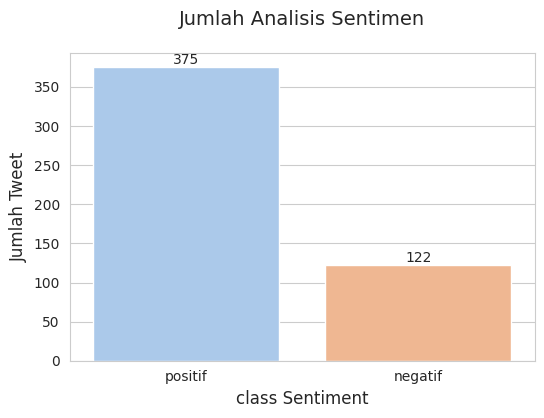

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('class Sentiment',fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labeling_Data.csv', encoding='utf8', index=False)

**ALGORITMA NAIVE BAYES **

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labeling_Data.csv")

**MENAMPILKAN INFORMASI DATASET**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stemming_data    497 non-null    object 
 1   sentiment score  497 non-null    float64
 2   sentiment        497 non-null    object 
dtypes: float64(1), object(2)
memory usage: 11.8+ KB


**MENAMPILKAN BARIS PERTAMA DATASET**

In [ ]:
data.head(497)

,stemming_data,sentiment score,sentiment
0,sih food estate realisasi bentuk korupsi penya...,0.0000,positif
1,sih food estate realisasi bentuk korupsi penya...,0.0000,positif
2,mukarromahnur msaid didu food estate aja gagal...,0.0000,positif
3,tvonenews dasamuka mk hancur kpk hancur food e...,0.0000,positif
4,geetracker santorinissun internet cepat manfaa...,0.0000,positif
...,...,...,...
492,raprap bangher xquitavee dennysiregar anakkolo...,0.0000,negatif
493,dennysiregar gimana makan gratis food estate ...,0.0516,positif
494,dirhamfaizal minietweets budimandjatmiko suka ...,0.0000,positif
495,dedimulyadi contoh food estate ya bro,0.0000,positif


PERSIAPKAN DATASET INSTALASI PERPUSTAKAAN

In [ ]:
!pip install scikit-learn

IMPORT PERPUSTAKAAN YANG DIPEPUSTAKAAN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Spliting dataset Latih dan Uji

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['stemming_data'], data['sentiment'], test_size=0.2, random_state=42)


Mencetak jumlah data latih dan data uji

In [ ]:
print(f'Jumlah Data Latih: {len(x_train)}')
print(f'Jumlah Data Uji: {len(x_test)}')

Jumlah Data Latih: 397
Jumlah Data Uji: 100


Ekstraksi Fitur : mengubah teks menjadi vektor fitur

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vektorizer = CountVectorizer()
x_train_vectorizer = vektorizer.fit_transform(x_train)
x_test_vectorizer = vektorizer.transform(x_test)

cetak hasil ekstraksi fitur

In [ ]:
print('Hasil Ekstraksi Fitur:')
print('-----------------------')
print('Vektor Fitur Data Latih')
print(x_train_vectorizer.toarray())  # Use x_train_vectorizer instead of x_train_vectorized
print('\nVektor Fitur Data Uji:')
print(x_test_vectorizer.toarray())


Hasil Ekstraksi Fitur:
-----------------------
Vektor Fitur Data Latih
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vektor Fitur Data Uji:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Latih model Naive Bayes menggunakan Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Add this import statement

vektorizer = CountVectorizer()
x_train_vectorizer = vektorizer.fit_transform(x_train)
x_test_vectorizer = vektorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vectorizer, y_train)


MultinomialNB()

Evaluasi model menggunakan data uji

In [ ]:
predictions = model.predict(x_test_vectorizer)  # Use x_test_vectorizer instead of x_test_vectorized

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:\n', classification_report(y_test, predictions))

print('\nConfusion Matrix:\n', confusion_matrix(y_test, predictions))


Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

     negatif       0.67      0.06      0.11        33
     positif       0.68      0.99      0.80        67

    accuracy                           0.68       100
   macro avg       0.67      0.52      0.46       100
weighted avg       0.68      0.68      0.58       100


Confusion Matrix:
 [[ 2 31]
 [ 1 66]]


Untuk membuat plot Confusion Matrix

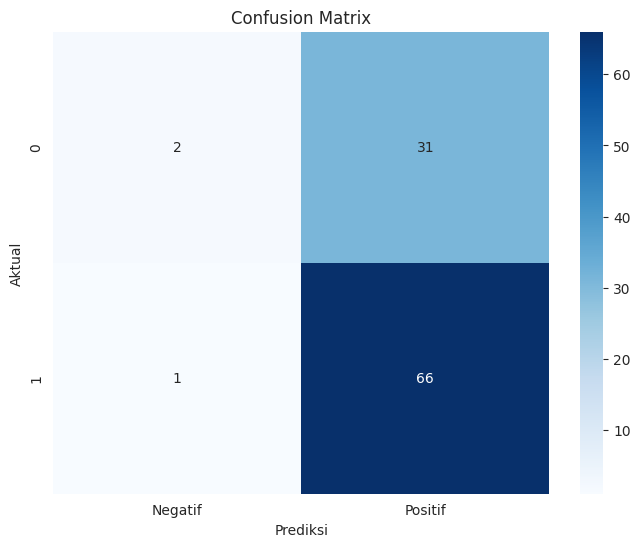

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Accuracy on Training Data: 0.93

Classification Report on Training Data:
               precision    recall  f1-score   support

     negatif       0.95      0.71      0.81        89
     positif       0.92      0.99      0.95       308

    accuracy                           0.93       397
   macro avg       0.94      0.85      0.88       397
weighted avg       0.93      0.93      0.92       397



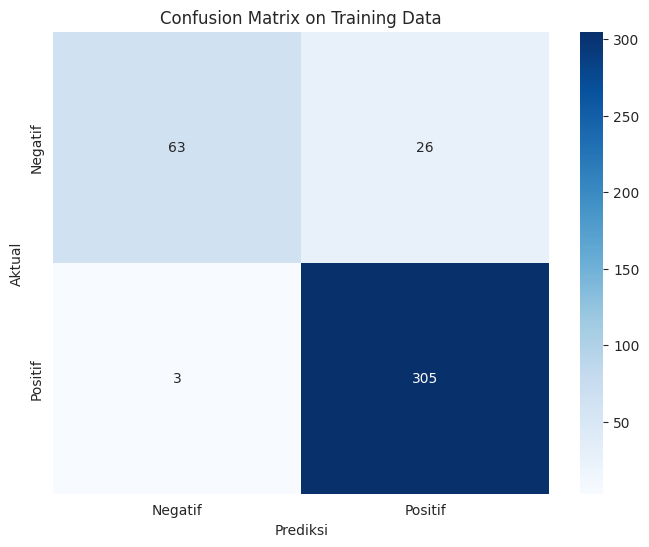

In [ ]:
# Evaluasi Model menggunakan data latih
predictions_train = model.predict(x_train_vectorizer)

# Akurasi
accuracy_train = accuracy_score(y_train, predictions_train)
print(f'Accuracy on Training Data: {accuracy_train:.2f}')

# Report klasifikasi
print('\nClassification Report on Training Data:\n', classification_report(y_train, predictions_train))

conf_matrix_train = confusion_matrix(y_train, predictions_train)

# Plot confusion matrix untuk data latih
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
